# 경사하강법 (Gradient Descent)

미분을 이용해 오차값을 줄이는 방향으로 기울기 a와 절편 b를 반복적으로 수정해가는 방법

#### 2차 함수의 그래프에서 기울기가 0이 되는 x 좌표를 찾아가는 방법
* 기울기 a의 변화에 따른 오차(RMSE)의 변화로 2차 함수 그래프를 만들고, 적절한 학습률을 설정해 미분값이 0인 지점을 구하는 것
* 학습율 : a값의 변화(이동)폭

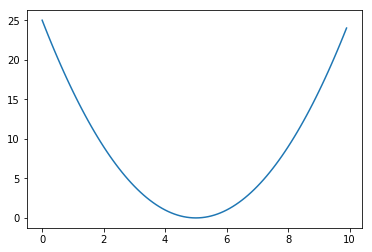

In [25]:
import numpy as np
import matplotlib.pyplot as plt

xvalues = np.arange(0,10,0.1)
yvalues = [(x-5)**2 for x in xvalues]

plt.plot(xvalues,yvalues)
plt.show()

## 경사하강법 날코딩

최소값: 3.238826948140327 , 최소값의 기울기: 7.5 , 최소값의 절편: 48.29999999999986
기울기 a: 7.5 , 절편 b: 48.3
소요시간:  8.739 s.


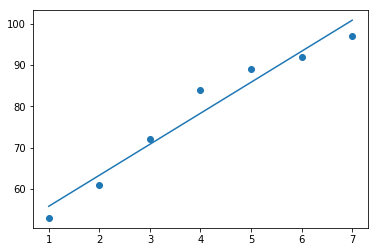

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import time

# 실제 성적
real_scores = [53, 61,72, 84, 89, 92, 97]
# 공부한 시간
study_times = [1, 2, 3, 4, 5, 6, 7]

#예측 함수
def predict(a, std_time, b):
    return a * std_time + b

# 평균제곱근오차 함수
def rmse(predict_scores, real_scores):
    n = len(predict_scores)
    sum_squared_error = np.sum([(predict_scores[i] - real_scores[i])**2 for i in range(n)])
    mean_squared_error = sum_squared_error / n
    root_mean_squared_error = np.sqrt(mean_squared_error)
    return root_mean_squared_error


def calc_rmse(a, b, study_times,real_scores):
    # 각 공부 시간에 대한 성적 예측값
    predict_scores = [predict(a, st, b) for st in study_times]
    rmse_val = rmse(predict_scores, real_scores)
#     print("a:", a, ", 평균 제곱근 오차(rmse):", rmse_val)
    return rmse_val

start_time = time.time()

a_range = np.arange(0,40,0.1)
b_range = np.arange(10,90,0.1)
min_val = None
min_i = None
min_b = None

for i in a_range:
    for b in b_range:
        rmse_val = calc_rmse(i, b, study_times,real_scores)
        if min_val is None:
            min_val = rmse_val
            min_i = i
            min_b = b
        elif min_val > rmse_val:
            min_val = rmse_val
            min_i = i
            min_b = b

# plt.plot(a_range,rmse_vals)
# plt.show()

print("최소값:", min_val, ", 최소값의 기울기:" , min_i, ", 최소값의 절편:" , min_b)

a = round(min_i,2)
b = round(min_b,2)

print("기울기 a:", a, ", 절편 b:" , b)

print("소요시간: " , round(time.time() - start_time, 4), "s.")
predict_scores = [predict(a, st, b) for st in study_times]

plt.scatter(study_times,real_scores)
plt.plot(study_times,predict_scores)
plt.show()

## 경사하강법 Tensorflow

Epoch: 0, RMSE = 33.1238, 기울기 a=7.6648, y절편 b=80.5906
Epoch: 100, RMSE = 12.5989, 기울기 a=2.0388, y절편 b=75.3634
Epoch: 200, RMSE = 10.8243, 기울기 a=2.8726, y절편 b=71.2341
Epoch: 300, RMSE = 9.1065, 기울기 a=3.6931, y절편 b=67.1713
Epoch: 400, RMSE = 7.4804, 기울기 a=4.4913, y절편 b=63.2185
Epoch: 500, RMSE = 6.0082, 기울기 a=5.2508, y절편 b=59.4576
Epoch: 600, RMSE = 4.7921, 기울기 a=5.9408, y절편 b=56.0407
Epoch: 700, RMSE = 3.9506, 기울기 a=6.5139, y절편 b=53.2027
Epoch: 800, RMSE = 3.5057, 기울기 a=6.9291, y절편 b=51.1469
Epoch: 900, RMSE = 3.3265, 기울기 a=7.1915, y절편 b=49.8472
Epoch: 1000, RMSE = 3.2657, 기울기 a=7.3441, y절편 b=49.0915
Epoch: 1100, RMSE = 3.2465, 기울기 a=7.4298, y절편 b=48.6674
Epoch: 1200, RMSE = 3.2406, 기울기 a=7.4773, y절편 b=48.4323
Epoch: 1300, RMSE = 3.2388, 기울기 a=7.5035, y절편 b=48.3025
Epoch: 1400, RMSE = 3.2382, 기울기 a=7.5179, y절편 b=48.2309
Epoch: 1500, RMSE = 3.2381, 기울기 a=7.5259, y절편 b=48.1914
Epoch: 1600, RMSE = 3.2380, 기울기 a=7.5303, y절편 b=48.1696
Epoch: 1700, RMSE = 3.2380, 기울기 a=7.5327, y절편 b=48.1576
E

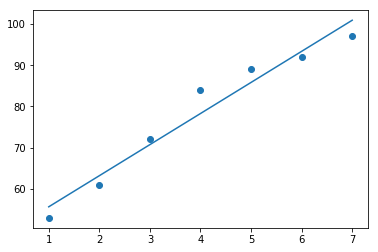

소요시간:  0.8508 s.


In [112]:
import tensorflow as tf
import matplotlib.pyplot as plt
import time

# 실제 성적
real_scores = [53, 61,72, 84, 89, 92, 97]
# 공부한 시간
study_times = [1, 2, 3, 4, 5, 6, 7]

#난수(1행1열, 평균 0, 표준편차 10)를 기반으로 기울기 Variable생성 
a = tf.Variable(tf.random_uniform([1],0,10, dtype=tf.float64, seed=0)) 

#난수(1행1열, 평균 0, 표준편차 100)를 기반으로 절편 Variable생성 
b = tf.Variable(tf.random_uniform([1],0,100, dtype=tf.float64, seed=0)) 

# y에 대한 1차방정식(학습시간에 따른 성적 예측 함수) 만들기
y = a * study_times + b

# 평균제곱근오차 RMSE 함수 만들기
# (실제값과 예측값의 차의 제곱)의 평균값의 제곱근
rmse = tf.sqrt(tf.reduce_mean(tf.square(y - real_scores)))

#학습률 
learning_rate = 0.1

#RMSE값을 최소화하는 기울기값, 절편 찾기 식 민들기
gradient_descent = tf.train.GradientDescentOptimizer(learning_rate).minimize(rmse)

start_time = time.time()


# Tensorflow를 이용한 학습
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # 2001번 반복실행
    for step in range(2000):
        sess.run(gradient_descent)
        if step % 100 == 0:
            print("Epoch: %.f, RMSE = %.04f, 기울기 a=%.4f, y절편 b=%.04f" % 
                  (step, sess.run(rmse), sess.run(a), sess.run(b)) )
    
    predict_scores = sess.run(y)
    
    plt.scatter(study_times,real_scores)
    plt.plot(study_times,predict_scores)
    plt.show()
print("소요시간: " , round(time.time() - start_time, 4), "s.")